In [1]:
from transformers import AutoModel, AutoImageProcessor
import torch
import matplotlib.pyplot as plt
from PIL import Image

c:\Users\prabh\FAU\Study\Project Attention maps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the model and feature extractor

model_name = "google/vit-base-patch16-224-in21k"
model = AutoModel.from_pretrained(model_name, output_attentions=True)



In [3]:

# Enable gradients if needed for attention
model.eval()


ViTModel(
  (embeddings): ViTEmbeddings(
    (patch_embeddings): ViTPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): ViTEncoder(
    (layer): ModuleList(
      (0-11): 12 x ViTLayer(
        (attention): ViTSdpaAttention(
          (attention): ViTSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): ViTSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): ViTIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUAct

In [4]:
# Load and preprocess image
image_path = "sample-data/example-leaf.jpg"  # Replace with your image path
image = Image.open(image_path)
feature_extractor = AutoImageProcessor.from_pretrained(model_name)
inputs = feature_extractor(images=image, return_tensors="pt")

In [5]:

# Forward pass to get attentions
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention maps per layer

`ViTSdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


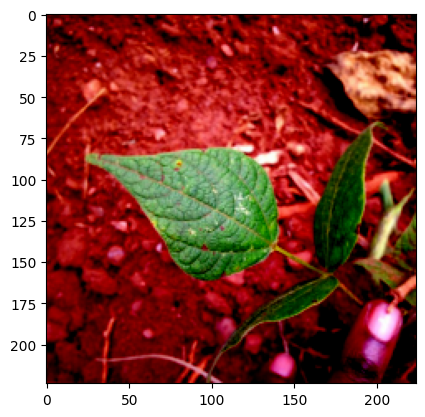

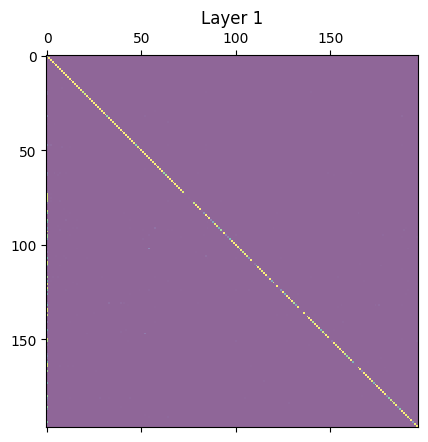

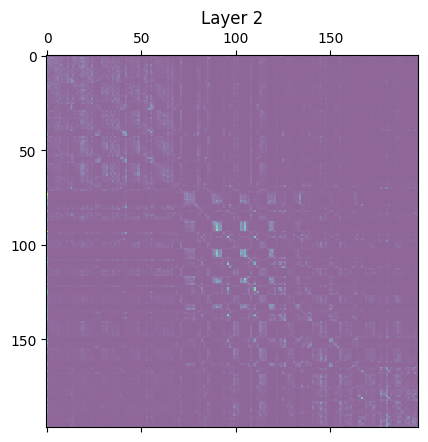

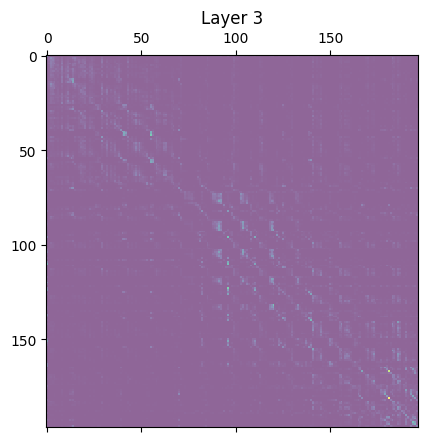

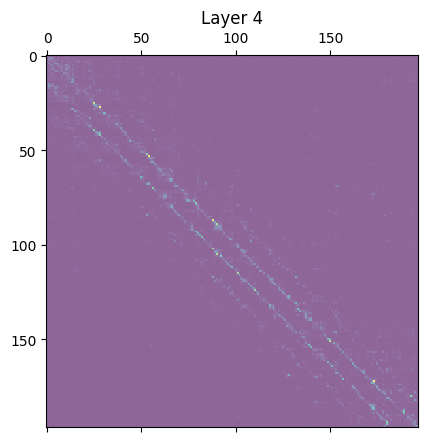

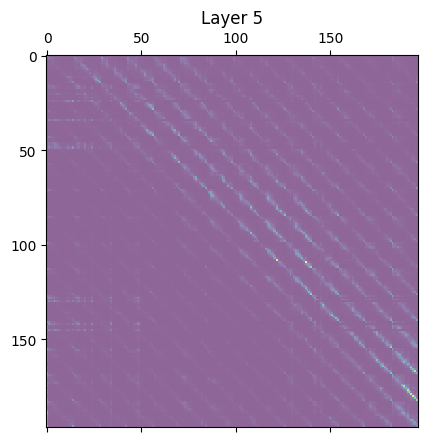

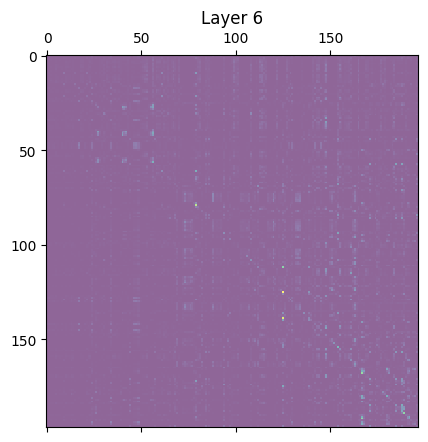

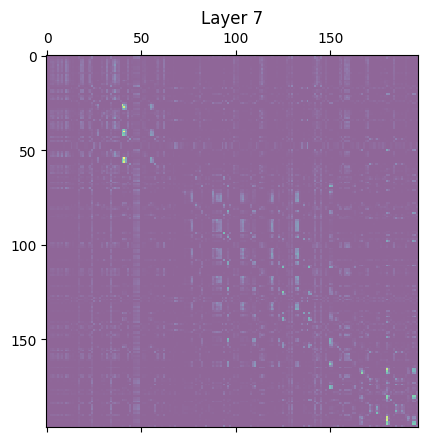

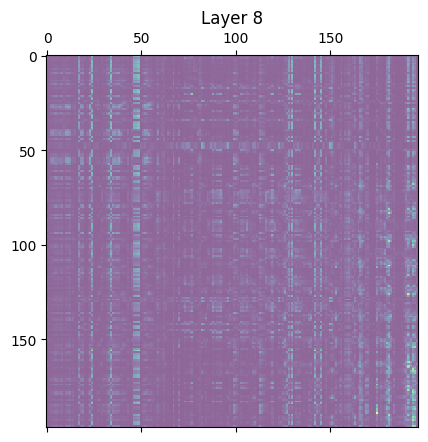

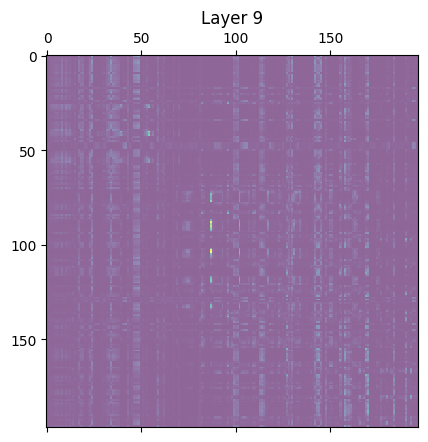

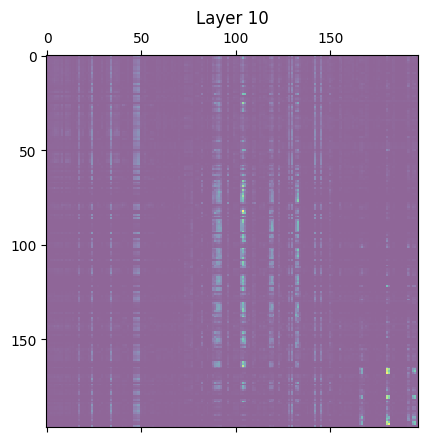

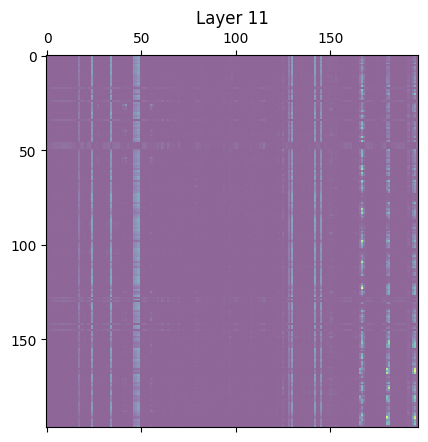

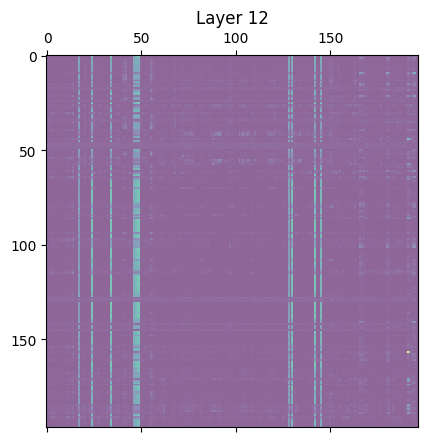

In [6]:
# Visualize attentions over the image

# Get the image tensor
image_tensor = inputs.pixel_values[0].permute(1, 2, 0).numpy()

# Plot the image
plt.imshow(image_tensor)

# Plot the attentions of each layer side by side on top of the image
for i, attention in enumerate(attentions):
    # Attention is of shape (batch_size, num_heads, sequence_length, sequence_length)
    # We will plot the attention of the first head of the first layer
    attention_map = attention[0, 0].numpy()
    plt.matshow(attention_map, cmap="viridis", alpha=0.6)
    plt.title(f"Layer {i + 1}")
    plt.show()